# Installing and importing libraries

In [1]:
!pip install beautifulsoup4
!pip install numpy
!pip install xlrd
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import re
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sentence_transformers import SentenceTransformer

c:\users\wiktor\appdata\local\programs\python\python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Loading dataset

In [3]:
# Loading jokes
jokes = {}
begin_joke_str = '<!--begin of joke -->'
end_joke_str = '<!--end of joke -->'
for f in os.listdir('dataset\\jokes'):
    joke_no = f[4:-5]
    with open(os.path.join('dataset\\jokes', f)) as html:
        soup = BeautifulSoup(html)
        soup_str = str(soup)
        start_joke_idx = soup_str.find(begin_joke_str) + len(begin_joke_str) + 1
        end_joke_idx = soup_str.find(end_joke_str)
        joke = soup_str[start_joke_idx:end_joke_idx]
        # Remove html tags (note - we could remove more things like enters but bert deals with them)
        joke = re.sub('<[^<]+?>', '', joke)
        
        jokes[joke_no] = joke

# Sort by joke number to preserve order
jokes = dict(sorted(jokes.items(), key=lambda x: int(x[0])))
jokes

{'1': 'A man visits the doctor. The doctor says "I have bad news for you.You have\ncancer and Alzheimer\'s disease". \nThe man replies "Well,thank God I don\'t have cancer!"\n',
 '2': 'This couple had an excellent relationship going until one day he came home\nfrom work to find his girlfriend packing. He asked her why she was leaving him\nand she told him that she had heard awful things about him. \n\n"What could they possibly have said to make you move out?" \n\n"They told me that you were a pedophile." \n\nHe replied, "That\'s an awfully big word for a ten year old." \n',
 '3': "Q. What's 200 feet long and has 4 teeth? \n\nA. The front row at a Willie Nelson Concert.\n",
 '4': "Q. What's the difference between a man and a toilet? \n\nA. A toilet doesn't follow you around after you use it.\n",
 '5': "Q.\tWhat's O. J. Simpson's Internet address? \nA.\tSlash, slash, backslash, slash, slash, escape.\n",
 '6': "Bill &amp; Hillary are on a trip back to Arkansas. They're almost out of gas, 

In [4]:
emb_model = SentenceTransformer('bert-base-cased')
embeddings = emb_model.encode(list(jokes.values()))
X = embeddings
X.shape

No sentence-transformers model found with name C:\Users\Wiktor/.cache\torch\sentence_transformers\bert-base-cased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at C:\Users\Wiktor/.cache\torch\sentence_transformers\bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassifica

(100, 768)

In [5]:
# Loading ratings
# Note - 99 is a missing grade
ratings_df = None
for f in os.listdir('dataset\\ratings'):
    df = pd.read_excel(os.path.join('dataset\\ratings', f), header=None)
    if ratings_df is None:
        ratings_df = df
    else:
        ratings_df = pd.concat([ratings_df, df])

ratings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [6]:
df.dtypes

0        int64
1      float64
2      float64
3      float64
4      float64
        ...   
96     float64
97     float64
98     float64
99     float64
100    float64
Length: 101, dtype: object

In [7]:
# Fixing ratings
ratings_df.drop([0], axis=1, inplace=True)
ratings_df.replace(99.00, np.nan, inplace=True)
ratings_df.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [8]:
# Calculating average rating for every joke
y = ratings_df.mean()
y

1      0.901997
2      0.162989
3      0.193411
4     -1.412599
5      0.235352
         ...   
96     1.373027
97     1.489106
98     0.869864
99    -0.036189
100    1.116812
Length: 100, dtype: float64

In [9]:
max(y)

3.3625929395733083

In [10]:
min(y)

-3.7045409911996297

# Task 1 - Dividing data into train and test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=121)

# Helper function for all future tasks 

In [12]:
def test_models(models, X_train, X_test, y_train, y_test, no_epochs, ylim):
    fig, axs = plt.subplots(nrows=len(models), figsize=(16, 6*len(models)))
    for i, (desc, model) in enumerate(models.items()):
        train_loss = []
        val_loss = []
        for _ in range(no_epochs):
            model.partial_fit(X_train, y_train)
            train_loss.append(mean_squared_error(y_train, model.predict(X_train)))
            val_loss.append(mean_squared_error(y_test, model.predict(X_test)))
        
        # Avoid error with plotting only one chart
        if len(models) == 1:
            axs.set_title(desc)
            axs.set_ylabel("Loss")
            axs.set_ylim(0, ylim)
            axs.plot(train_loss, label="Train loss")
            axs.plot(val_loss, label="Validation loss")
            axs.legend()
        else:
            axs[i].set_title(desc)
            axs[i].set_ylabel("Loss")
            axs[i].set_ylim(0, ylim)
            axs[i].plot(train_loss, label="Train loss")
            axs[i].plot(val_loss, label="Validation loss")
            axs[i].legend()

    plt.xlabel("Number of epochs")
    plt.show()

# Task 2 - default testing

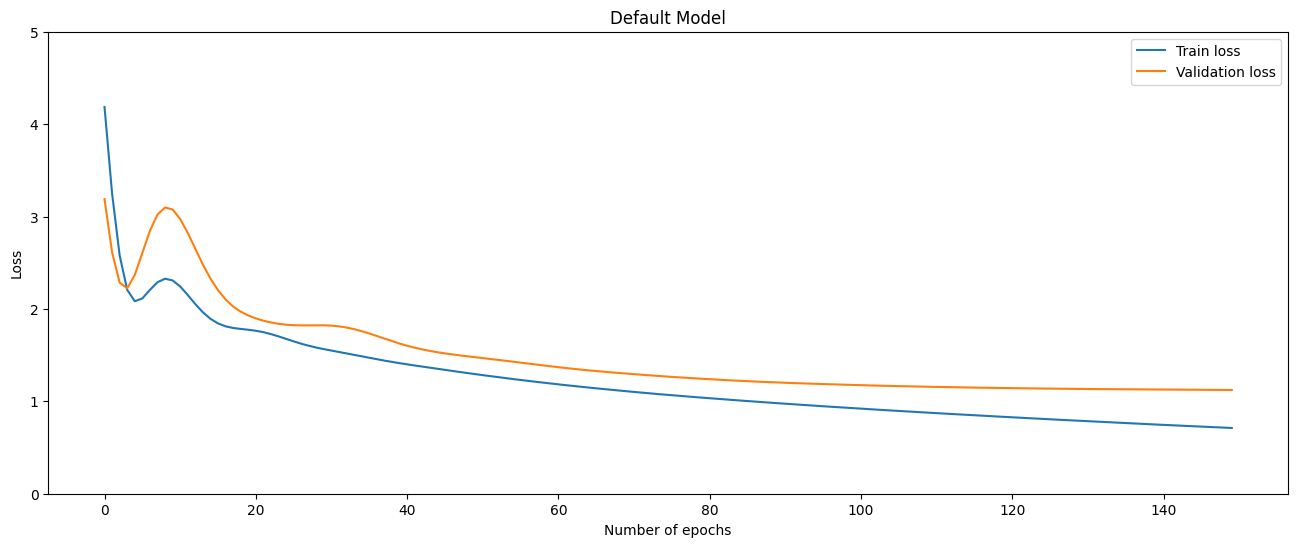

In [13]:
models = {
    "Default Model": MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant', random_state=121)
}

test_models(models, X_train, X_test, y_train, y_test, 150, 5)

# Task 3 - different learning rates

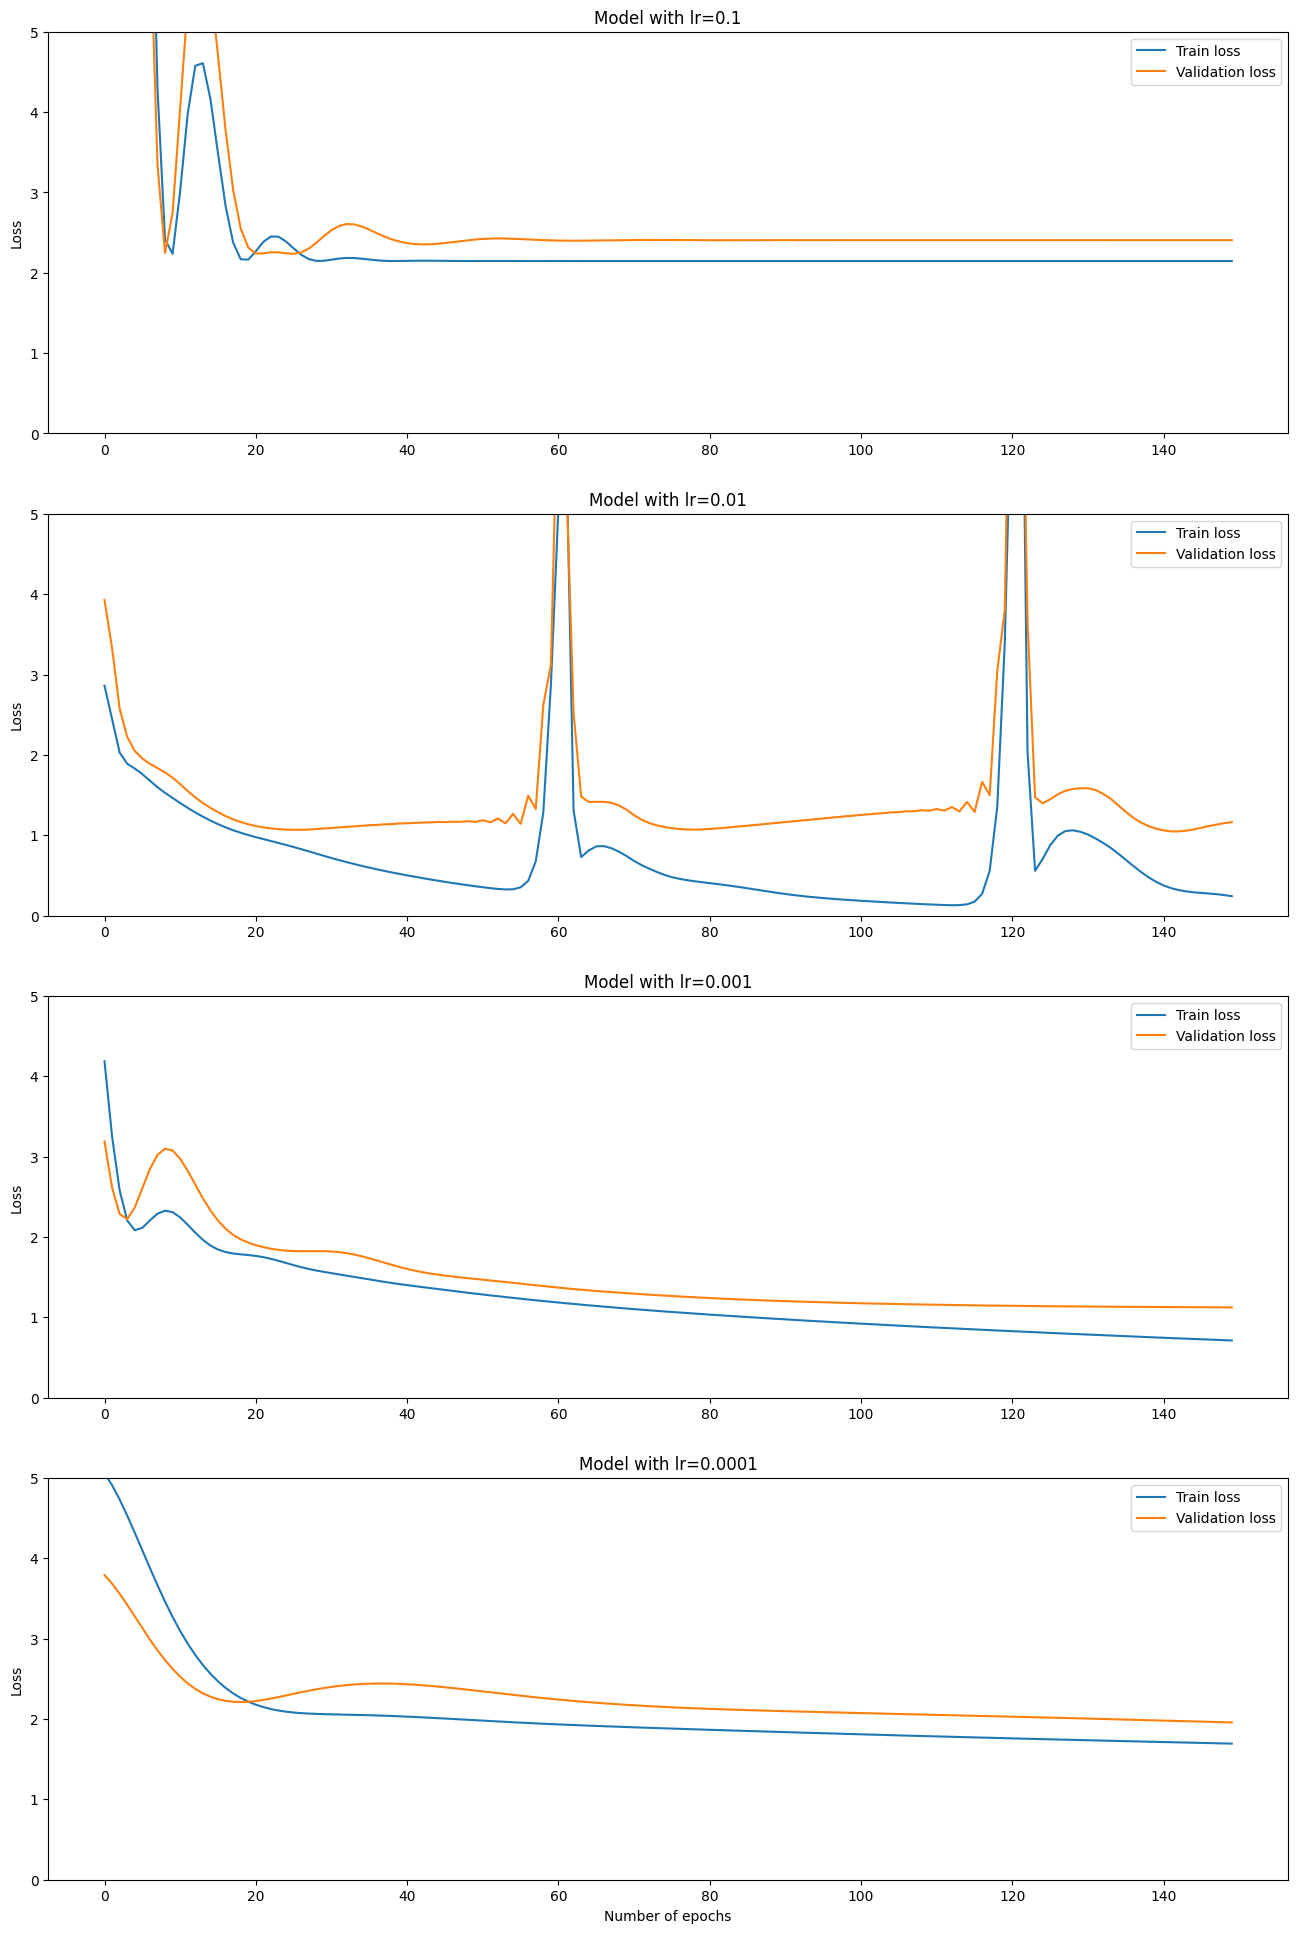

In [14]:
models = {
    "Model with lr=0.1": MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant', learning_rate_init=0.1, random_state=121),
    "Model with lr=0.01": MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant', learning_rate_init=0.01, random_state=121),
    "Model with lr=0.001": MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant', learning_rate_init=0.001, random_state=121),
    "Model with lr=0.0001": MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant', learning_rate_init=0.0001, random_state=121)
}

test_models(models, X_train, X_test, y_train, y_test, 150, 5)

# Task 4 - different amount of hidden layers

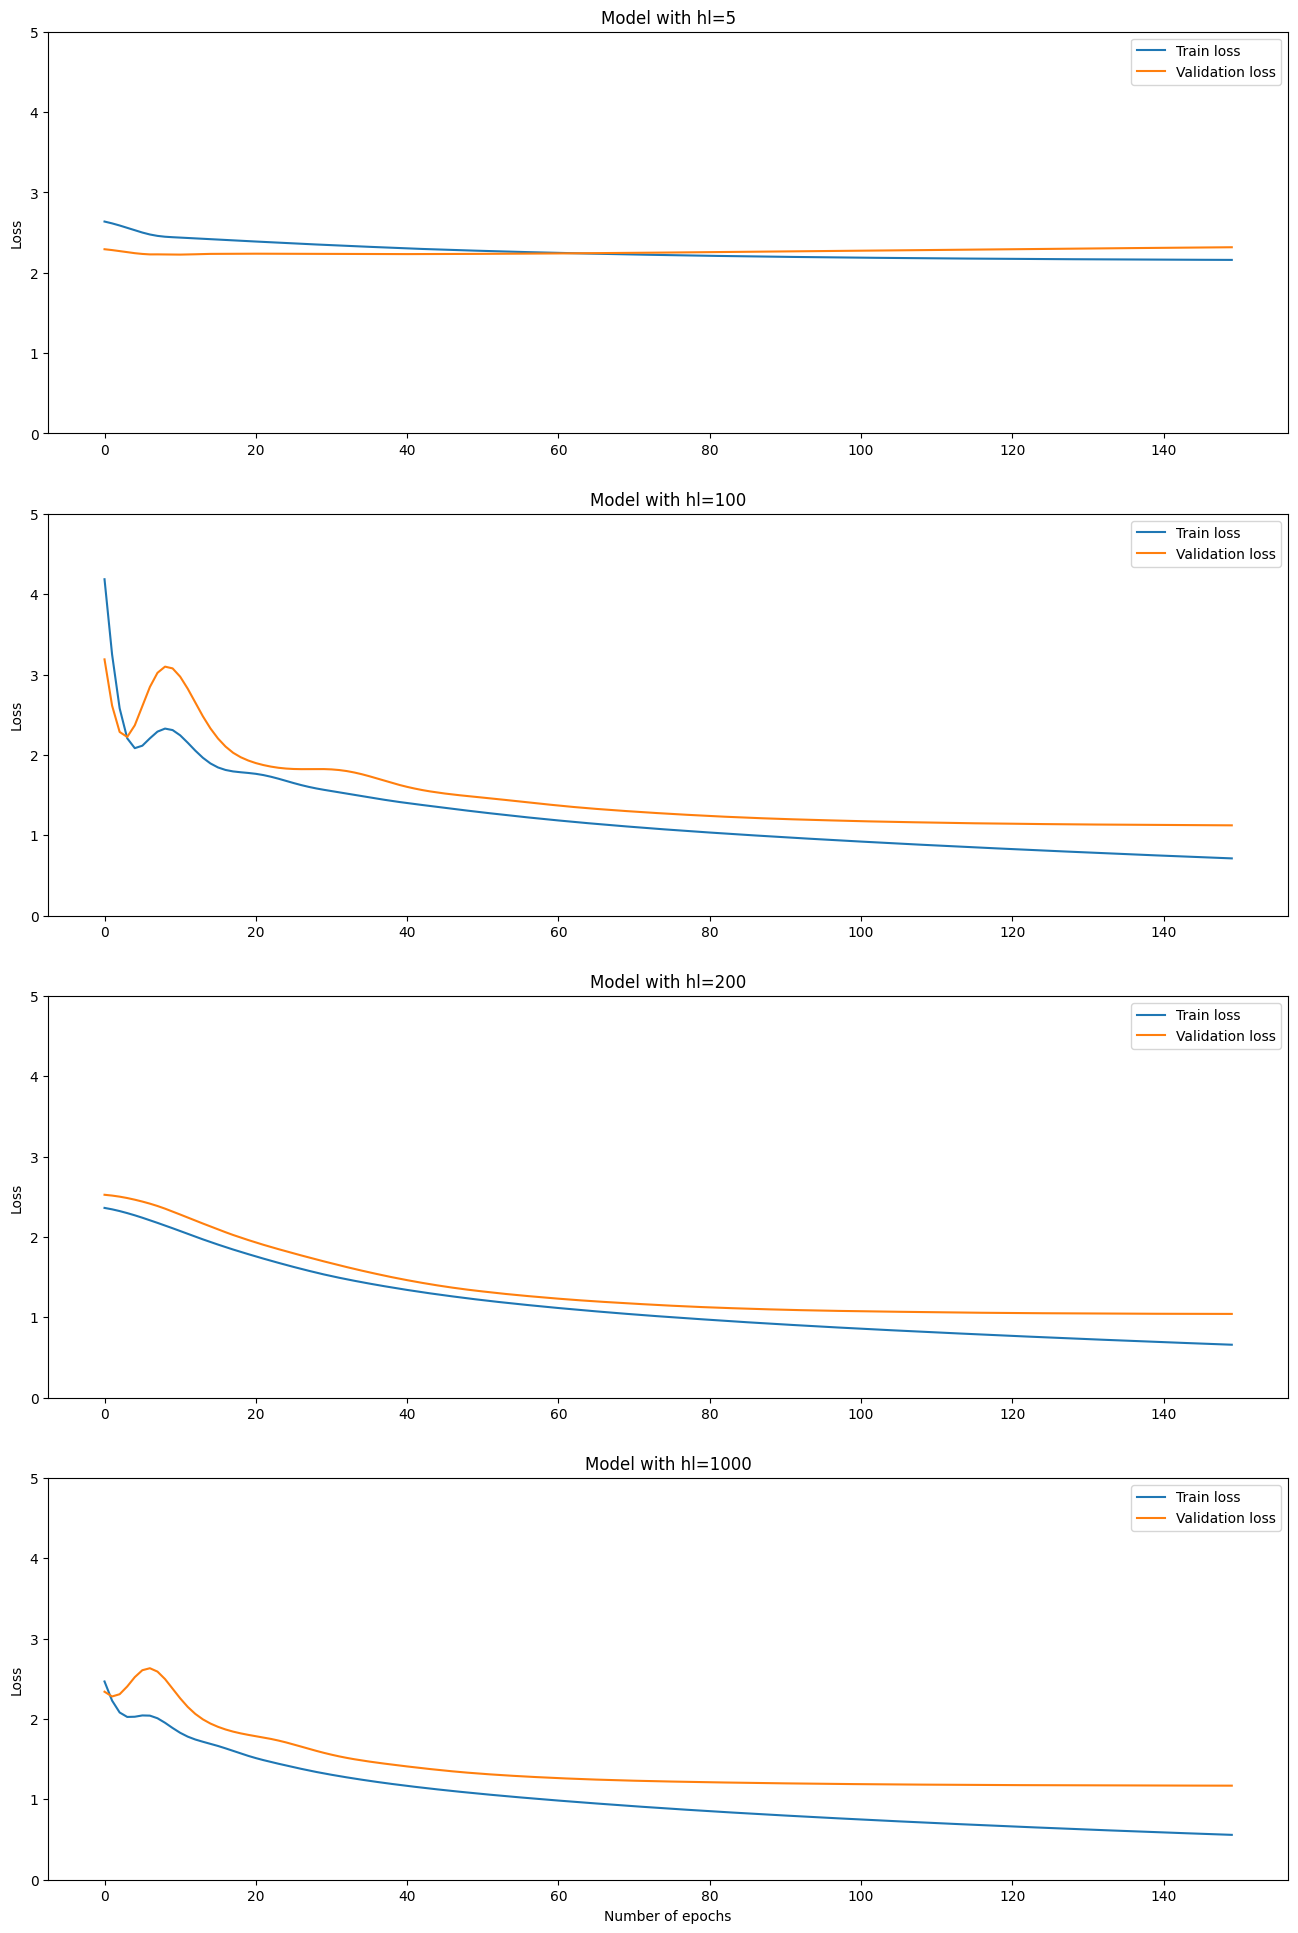

In [15]:
models = {
    "Model with hl=5": MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant', hidden_layer_sizes=5, random_state=121),
    "Model with hl=100": MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant', hidden_layer_sizes=100, random_state=121),
    "Model with hl=200": MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant', hidden_layer_sizes=200, random_state=121),
    "Model with hl=1000": MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant', hidden_layer_sizes=1000, random_state=121)
}

test_models(models, X_train, X_test, y_train, y_test, 150, 5)

# Task 5 - choosing the best model

In [16]:
model = MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant', hidden_layer_sizes=200, random_state=121)
for _ in range(150):
    model.partial_fit(X_train, y_train)

In [17]:
test_str = "Two aerials get married. The ceremony was rubbish – but the reception was brilliant."
emb_text = emb_model.encode([test_str])
pred = model.predict(emb_text)
pred[0]

-0.20989072

# Task 6 - different regularization amount (learning_rate_init set to 0.01, hidden_layer_size set to 500)

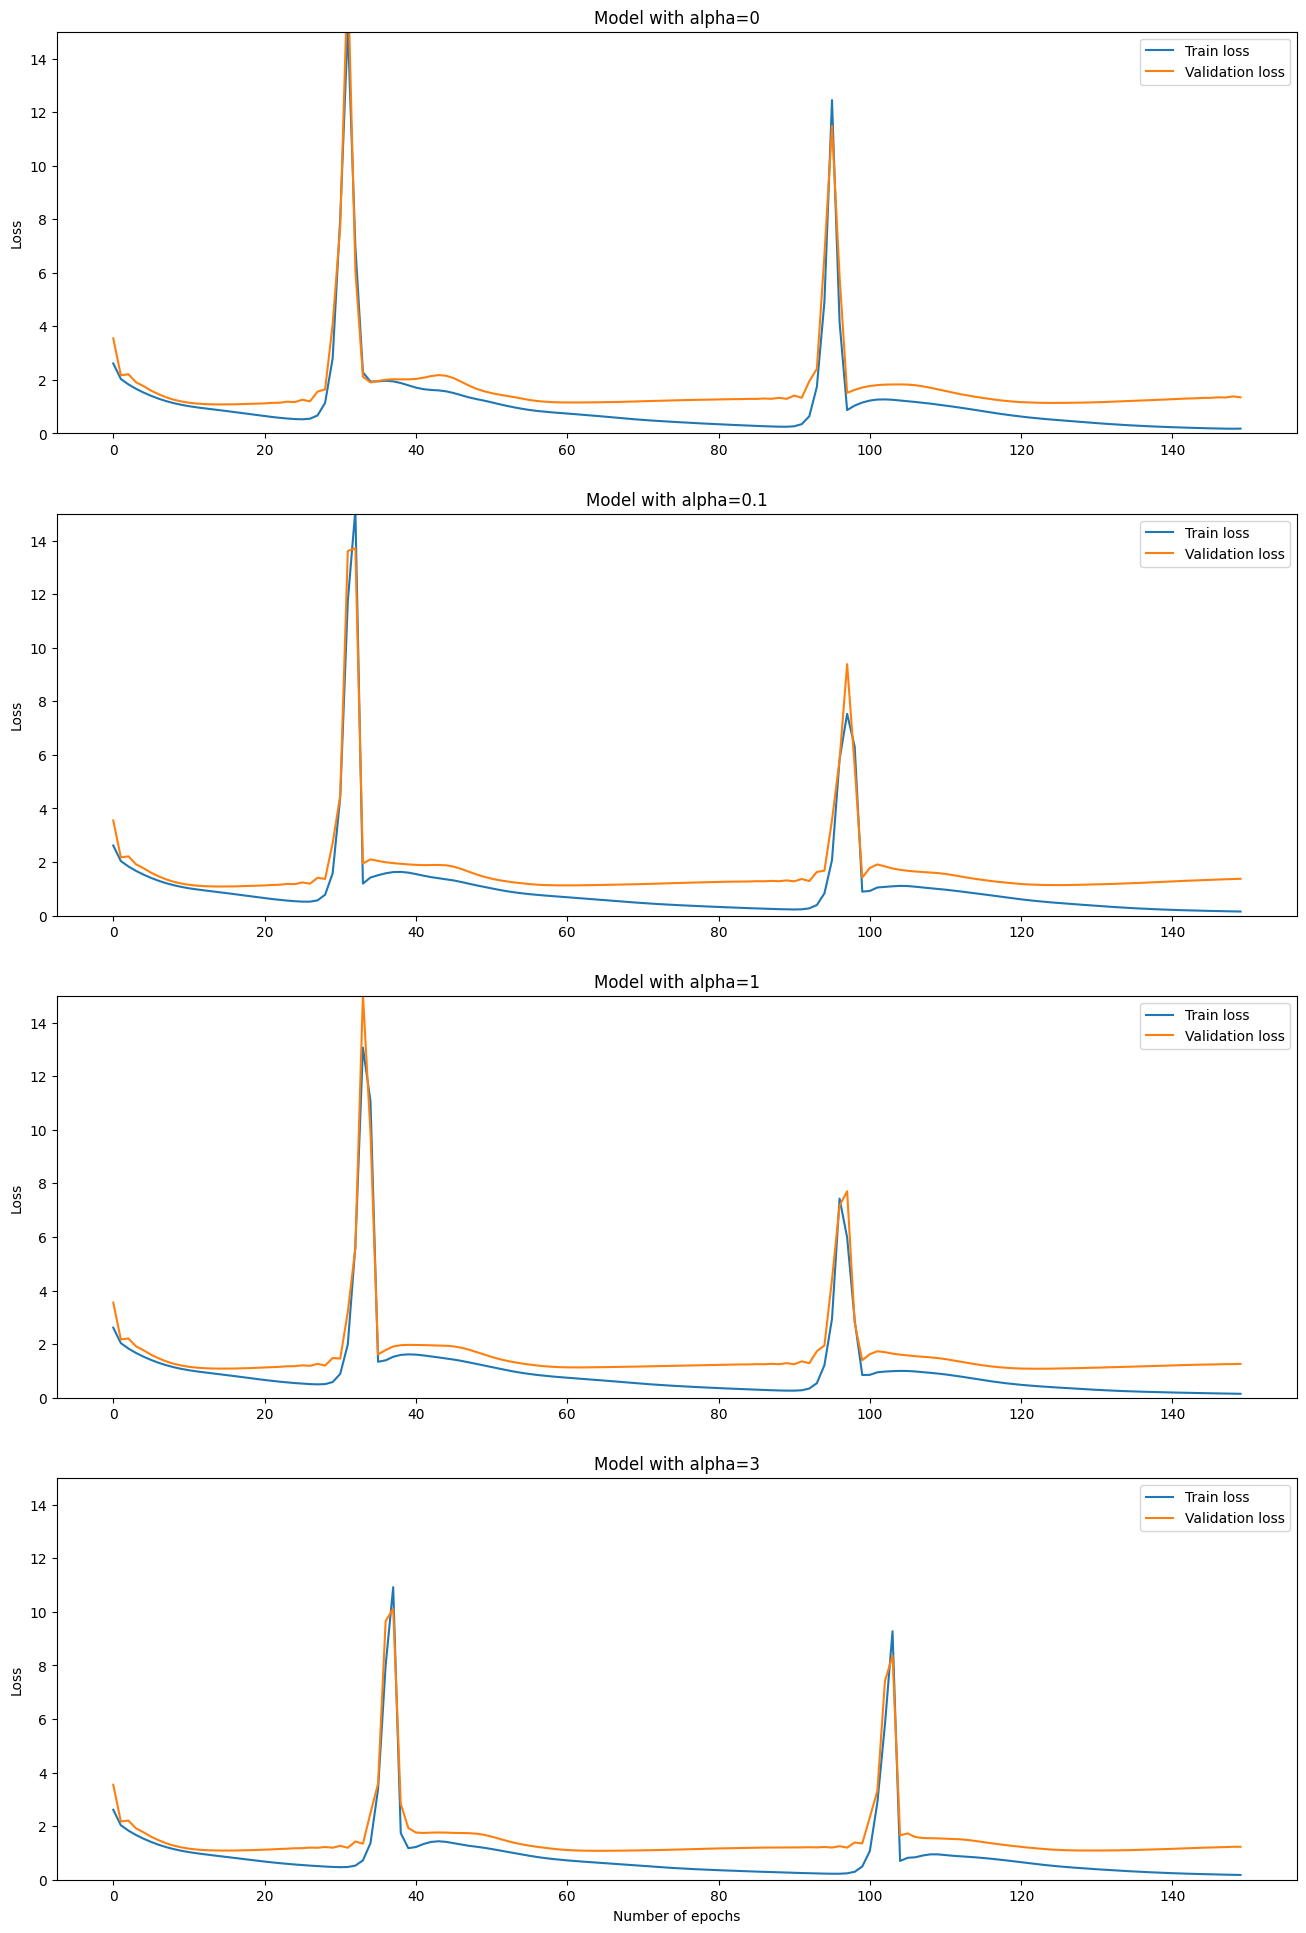

In [18]:
models = {
    "Model with alpha=0": MLPRegressor(solver='sgd', alpha=0, learning_rate='constant', hidden_layer_sizes=500, learning_rate_init=0.01, random_state=121),
    "Model with alpha=0.1": MLPRegressor(solver='sgd', alpha=0.1, learning_rate='constant', hidden_layer_sizes=500, learning_rate_init=0.01, random_state=121),
    "Model with alpha=1": MLPRegressor(solver='sgd', alpha=1, learning_rate='constant', hidden_layer_sizes=500, learning_rate_init=0.01, random_state=121),
    "Model with alpha=3": MLPRegressor(solver='sgd', alpha=3, learning_rate='constant', hidden_layer_sizes=500, learning_rate_init=0.01, random_state=121)
}

test_models(models, X_train, X_test, y_train, y_test, 150, 15)

# All results and conclussions are in the report